### Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

Is the website redesign any good?

Is our television ad driving more sales?

Has the network latency increased since we switched internet service providers?

Null hypothesis: The new internet service provider has not increased network latency.

Alternative hypothesis: The new internet service provider has resulted in an increase in network latency. (one-tail test)

True positive: The test rejects the null hypothesis and the network latency has increased since switching internet service providers.

True negative: The test fails to reject the null hypothesis and the network latency has not increased since switching internet providers.

False positive: The test rejects the null hypothesis but the switch to another internet service provider did not actually increase network latency.

False negative: The test fails to reject the null hypothesis but the switch to another internet service provider did increase network latency.

Does the new website design increase the average monthly rate of customers who join?

Null hypothesis: The new website design has no effect on the average monthly rate of new customers.

Alternative hypothesis: The new website design has affected the average monthly rate of new customers.

True positive: The null hypothesis is rejected and the website has actually influenced the rate of new customers per month.

True negative: The test fails to reject the null hypothesis and the website indeed has no effect on the average amount of new customers per month. 

False positive: The test rejects the null hypothesis, but the website does not affect the average amount of new customers per month.

False negative: The test fails to reject the null hypothesis, but the website does indeed affect the average amount of new customers per month.

Does our television ad affect sales?

Null hypothesis: Our television ad has no effect on sales.

Alternative Hypothesis: Our television ad positively affects sales.

True positive: The test rejects the null hypothesis and the ad has positively affected sales.

True negative: The test fails to reject the null hypothesis and the ad has had no effect on sales.

False positive: The test rejects the null hypothesis but the ad does not affect sales.

False negative: The test fails to reject the null hypothesis but the ad does indeed affect sales.

### T-Test

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [4]:
m1 = 90
σ1 = 15
n1 = 40

m2 = 100
σ2 = 20
n2 = 50

alpha = .05

# H0: μ1 == μ2 There is no difference between the two offices in the average time it takes to sell homes.
# Ha: μ1 != μ2 There is a significant difference between the two offices in the average time it takes to sell homes.

In [5]:
t, p = stats.ttest_ind_from_stats(mean1=90, std1=15, nobs1=40, mean2=100, std2=20, nobs2=50)

In [6]:
t, p

(-2.6252287036468456, 0.01020985244923939)

In [7]:
if p < alpha:
    print('We can reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')

We can reject the null hypothesis.


#### Load the mpg dataset and use it to answer the following questions:

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

H0: There is no difference in fuel efficiency between cars from 2008 and cars from 1999.

Ha: There is a significant difference in fuel efficiency between cars from 2008 and cars from 1999.

In [8]:
df = data('mpg')

In [9]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
df.dropna()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [12]:
df['avg_mpg'] = (df.cty + df.hwy) / 2
df.avg_mpg

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: avg_mpg, Length: 234, dtype: float64

In [13]:
new_car_mpg = df[df.year == 2008].avg_mpg

In [14]:
old_car_mpg = df[df.year == 1999].avg_mpg

In [15]:
stat, pval = stats.levene(new_car_mpg, old_car_mpg)

In [16]:
if pval < .05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


In [17]:
tmpg, pmpg = stats.ttest_ind(new_car_mpg, old_car_mpg)

In [18]:
tmpg, pmpg

(-0.21960177245940962, 0.8263744040323578)

In [19]:
if pmpg < .05:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


#### Are compact cars more fuel-efficient than the average car?

In [20]:
compact_eff = df[df['class'] == 'compact'].avg_mpg

In [21]:
avg_eff = df.avg_mpg.mean()

H0: There is no difference between the fuel efficiency of compact cars compared to the average car.

Ha: Compact cars are more efficient than the average car.

One sample, one-tail t-test: μ of compact fuel efficiency > μ of average car

In [23]:
tfuel, pfuel = stats.ttest_1samp(compact_eff, avg_eff)

In [24]:
if pfuel/2 < alpha and tfuel > 0:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


#### Do manual cars get better gas mileage than automatic cars?

In [25]:
man_mpg = df[df.trans.str.contains('manual')].avg_mpg
man_mpg

2      25.0
3      25.5
6      22.0
8      22.0
10     24.0
13     21.0
15     20.0
24     21.0
26     21.0
28     19.5
49     17.0
52     15.5
56     14.0
65     14.0
69     14.0
70     10.5
72     13.5
79     17.0
85     15.5
86     14.5
91     22.0
93     21.5
96     18.5
97     19.0
99     17.0
100    30.5
102    28.5
103    26.0
105    30.0
108    25.0
110    22.5
112    26.0
114    22.0
117    24.0
118    24.0
121    20.0
122    20.5
142    25.0
145    27.5
146    23.0
149    22.0
152    16.0
160    21.5
162    23.5
163    22.0
167    22.5
168    22.5
172    22.0
173    23.5
174    17.5
177    16.0
180    25.0
182    26.0
185    22.0
188    25.0
189    26.0
192    22.0
196    30.5
197    32.5
201    17.5
203    19.5
204    16.0
206    16.5
208    25.0
210    25.0
212    20.5
213    38.5
214    25.0
217    25.0
219    25.0
221    20.5
222    39.5
224    25.0
226    24.0
228    25.0
231    25.0
233    22.0
Name: avg_mpg, dtype: float64

In [26]:
auto_mpg = df[df.trans.str.contains('auto')].avg_mpg
auto_mpg

1      23.5
4      25.5
5      21.0
7      22.5
9      20.5
11     23.0
12     20.0
14     21.0
16     19.5
17     21.0
18     19.5
19     17.0
20     13.0
21     17.0
22     15.0
23     14.5
25     19.0
27     20.0
29     16.5
30     12.5
31     13.0
32     15.5
33     23.0
34     26.0
35     22.0
36     23.5
37     21.5
38     21.0
39     20.5
40     19.0
41     19.0
42     20.5
43     20.5
44     14.0
45     18.5
46     18.0
47     19.5
48     19.5
50     16.0
51     15.0
53     16.5
54     16.5
55     10.5
57     13.0
58     15.0
59     15.0
60     10.5
61     15.0
62     13.5
63     15.5
64     13.0
66     10.5
67     15.0
68     15.0
71     13.0
73     15.0
74     13.0
75     14.0
76     14.0
77     15.0
78     15.5
80     15.5
81     16.0
82     16.0
83     15.0
84     15.5
87     14.5
88     15.0
89     13.0
90     15.0
92     21.5
94     20.0
95     18.0
98     18.5
101    28.0
104    28.0
106    30.5
107    30.0
109    22.0
111    25.5
113    22.0
115    23.5
116    22.5
119 

In [30]:
stat, pval = stats.levene(man_mpg, auto_mpg)

In [31]:
if pval < .05:
    print('We can reject the null hypothesis of equal variance.')
else:
    print('We fail to reject the null hypothesis of equal variance.')

We fail to reject the null hypothesis of equal variance.


In [39]:
ttrans, ptrans = stats.ttest_ind(man_mpg, auto_mpg)

In [40]:
if (ptrans/2 < alpha) and (t > 0):
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


### Correlation

#### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

H0: There is no linear correlation between tenure and monthly charges.

Ha: There is a linear correlation between tenure and monthly charges.

In [168]:
import numpy as np
import pandas as pd
from math import sqrt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv('telco_churn.csv')

In [170]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [172]:
x = df.tenure
y = df.MonthlyCharges
r, p = stats.pearsonr(x, y)
r, p

(0.2478998562861525, 4.094044991483017e-99)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


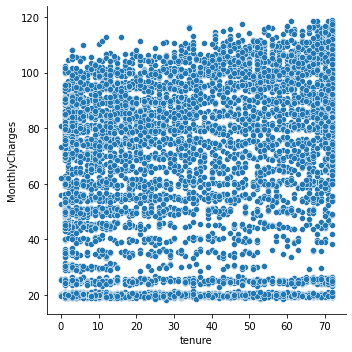

In [173]:
sns.relplot(df.tenure, df.MonthlyCharges)


In [174]:
df.TotalCharges = df.TotalCharges.str.strip().fillna('0').str.replace(' ', '')
#df.TotalCharges = df.TotalCharges.fillna(0)
#df.TotalCharges = df.TotalCharges.str.replace(np.nan,'', regex=True)
#df.TotalCharges = df[df.TotalCharges if not (pd.isnull(df.TotalCharges))]
df.TotalCharges = pd.to_numeric((df.TotalCharges), errors='coerce')


In [175]:
df = df.replace(np.nan, 0, regex=True)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [177]:
r2, p2 = stats.pearsonr(df.tenure,df.TotalCharges)
r2, p2

(0.8261783979502475, 0.0)

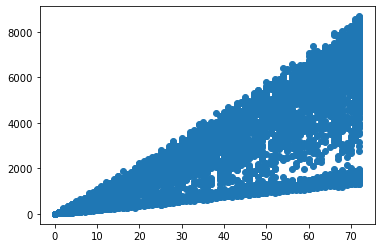

In [178]:
plt.scatter(df.tenure, df.TotalCharges)

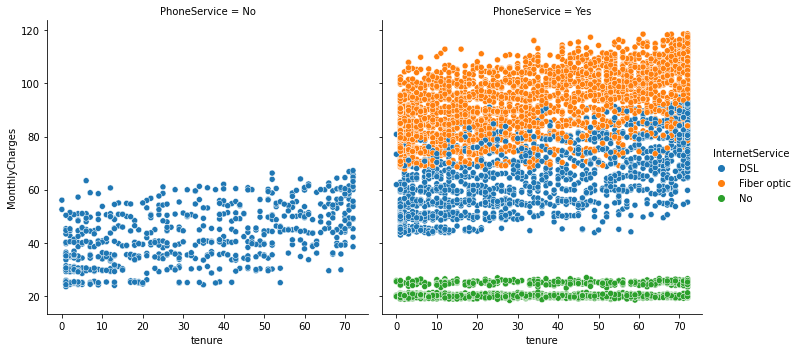

In [180]:
sns.relplot(data=df, x=df.tenure, y=df.MonthlyCharges, 
            col=df.PhoneService, hue=df.InternetService)

plt.show()

#### Use the employees database.
#### Is there a relationship between how long an employee has been with the company and their salary?


H0: There is no linear correlation between how long an employee has been with the company and their salary.

Ha: There is a linear correlation between how long an employee has been with the company and their salary.

In [31]:
import env
user = env.user
password = env.password
host = env.host
db = 'employees'

In [32]:
def get_db_url(db, env):
    if env:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return 'Access denied.'

In [33]:
access_db = get_db_url

In [185]:
query = '''SELECT *
            FROM employees as e
            JOIN salaries as s ON s.emp_no = e.emp_no
            WHERE to_date = '9999-01-01';'''

In [186]:
employees = pd.read_sql(query, access_db(db, env))

In [187]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01


In [188]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   emp_no      240124 non-null  int64 
 7   salary      240124 non-null  int64 
 8   from_date   240124 non-null  object
 9   to_date     240124 non-null  object
dtypes: int64(3), object(7)
memory usage: 18.3+ MB


In [189]:
import datetime
import time
employees.hire_date = pd.to_datetime(employees.hire_date)


In [190]:
employees['days_emp'] = (pd.Timestamp('today') - employees['hire_date']).dt.days

In [191]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date,days_emp
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01,13188
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01,13405
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01,13125
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01,13030
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01,12014


In [192]:

x = employees.days_emp
y = employees.salary

r, p = stats.pearsonr(x,y)

In [193]:
r,p

(0.3064625613186014, 0.0)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


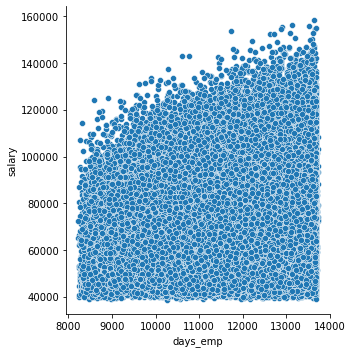

In [194]:
sns.relplot(x,y)

In [195]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

H0: There is no linear correlation between how long an employee has been with the company and the number of titles they had.

Ha: There is a linear correlation between how long an employee has been with the company and the number of titles they had.

In [200]:
query = '''select emp_no, datediff(max(to_date), min(from_date)) as tenure, count(title) as num_titles
    from titles
    group by emp_no
    having max(to_date) = '9999-01-01';'''

In [201]:
emp2 = pd.read_sql(query, access_db(db, env))

In [199]:
emp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   tenure      240124 non-null  int64
 2   num_titles  240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


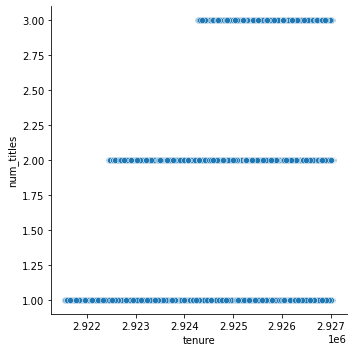

In [202]:
sns.relplot(data=emp2, x=emp2.tenure, y=emp2.num_titles)
plt.show()

In [203]:
r, p = stats.pearsonr(emp2.tenure, emp2.num_titles)
r, p

(0.5311014974074301, 0.0)

In [204]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### Use the sleepstudy data. Is there a relationship between days and reaction time?

H0: There is no linear correlation between sleep-deprived days and reaction time.

Ha: There is a linear correlation between sleep-deprived days and reaction time.

In [205]:
sleep = data('sleepstudy')

In [206]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [207]:
x = sleep.Days
y = sleep.Reaction

r, p = stats.pearsonr(x,y)

In [208]:
r, p

(0.5352302262650255, 9.89409632221439e-15)

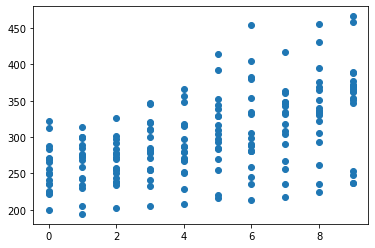

In [210]:
plt.scatter(x,y)
plt.show()

In [211]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Chi^2

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                Codeup Student	Not Codeup Student

Uses a Macbook	           49	        20

Doesn't Use A Macbook	    1	        30

H0: There is no association between using a Macbook and being a codeup student.

Ha: There is an association between using a Macbook and being a codeup student.

In [7]:
alpha = .05
index = ['Uses Macbook', 'Does Not Use Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses Macbook,49,20
Does Not Use Macbook,1,30


In [8]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [9]:
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
                      Codeup Student  Not Codeup Student
Uses Macbook                      49                  20
Does Not Use Macbook               1                  30
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [10]:
if p < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


#### Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

H0: There is no association between the drivetrain of a vehicle and the vehicle's transmission.

Ha: There is an association between the drivetrain of a vehicle and the vehicle's transmission.

In [136]:
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [147]:
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [153]:
df['trans'] = df.trans.replace(['auto(l4)','auto(l5)','auto(s6)','auto(l6)','auto(av)', 'auto(s5)','auto(s4)','auto(l3)'],'auto')

In [155]:
df['trans'] = df.trans.replace(['manual(m6)','manual(m5)'],'manual')

In [156]:
df.trans.value_counts()

auto      157
manual     77
Name: trans, dtype: int64

In [137]:
df.drv.value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [157]:
observed = pd.crosstab(df.drv, df.trans)
observed

trans,auto,manual
drv,,
4,75,28
f,65,41
r,17,8


In [158]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [159]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[75 28]
 [65 41]
 [17  8]]

Expected
[[69 33]
 [71 34]
 [16  8]]

----
chi^2 = 3.1368
p     = 0.2084


In [160]:
if p < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


#### Use the data from the employees database to answer these questions:

#### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


H0: There is no association between the gender of an employee and whether they work in sales or marketing.

Ha: There is an association between the gender of an employee and whether they work in sales or marketing.

In [30]:
query = '''SELECT e.emp_no, e.gender, d.dept_name
            FROM employees as e
            JOIN dept_emp as de ON de.emp_no = e.emp_no
            JOIN departments as d ON d.dept_no = de.dept_no
            WHERE de.to_date = '9999-01-01';'''

In [78]:
df_emp = pd.read_sql(query, access_db(db, env))

In [79]:
df_emp.head()

,emp_no,gender,dept_name
0,10038,M,Customer Service
1,10049,F,Customer Service
2,10060,M,Customer Service
3,10088,F,Customer Service
4,10112,F,Customer Service


In [80]:
df_emp.dept_name.value_counts()

Development           61386
Production            53304
Sales                 37701
Customer Service      17569
Research              15441
Marketing             14842
Quality Management    14546
Human Resources       12898
Finance               12437
Name: dept_name, dtype: int64

In [81]:
df_emp = df_emp[df_emp.dept_name.str.contains('Sales') | df_emp.dept_name.str.contains('Market')]


In [82]:
observed = pd.crosstab(df_emp.gender, df_emp.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [83]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [84]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [85]:
if p < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


#### Is an employee's gender independent of whether or not they are or have been a manager?

H0: There is no association between an employee's gender and whether or not they are or have been a manager.

Ha: There is an association between an employee's gender and whether or not they are or have been a manager.

In [86]:
query = '''SELECT e.emp_no, e.gender, dm.dept_no
            FROM employees as e
            JOIN dept_emp as de ON de.emp_no = e.emp_no
            JOIN departments as d ON d.dept_no = de.dept_no
            LEFT JOIN dept_manager as dm ON dm.emp_no = e.emp_no
            WHERE de.to_date = '9999-01-01';'''

In [125]:
df_man = pd.read_sql(query, access_db(db, env))

In [126]:
df_man

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
240119,499995,F,None
240120,499996,M,None
240121,499997,M,None
240122,499998,M,None


In [127]:
df_man.dept_no.value_counts()

d004    4
d006    4
d009    4
d001    2
d002    2
d003    2
d005    2
d007    2
d008    2
Name: dept_no, dtype: int64

In [128]:
df_man = df_man.assign(is_manager=df_man.dept_no.str.contains('d'))

In [129]:
df_man = df_man.fillna('False')

In [130]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   gender      240124 non-null  object
 2   dept_no     240124 non-null  object
 3   is_manager  240124 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.3+ MB


In [132]:
observed = pd.crosstab(df_man.gender, df_man.is_manager)

In [133]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [134]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13  95997]
 [    11 144103]]

Expected
[[     9  96000]
 [    14 144099]]

----
chi^2 = 1.4644
p     = 0.2262


In [135]:
if p < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.
